## INPUTS

In [1]:
# parameters for NGC 7814 provided in this paper: https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf 
#parameters 
n = 10       #concentration parameter, fixed at 10 (section 3.3 page 7)
re = 2.16    #effective radius, [kpc] (table 4)
L = 7e10     #bulge luminosity, [Lsun] (table 5)
ups = .64    #mass-to-light ratio of bulge (table 5)
q = 0.61     #intrinsic axis ratio (table 5)
i=90          #inclination angle [degrees] (table 1)

## Begin Code

In [2]:
import time
startTime = time.time()
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss

i = i*(np.pi/180)                                  #inclination angle

 #gamma function
f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations
bn = root

I0 = (L*(bn**(2*n)))/(((re**2)*2*np.pi*n)*ss.gamma(2*n)) 

r0 = re/bn**n

print(r0)                              #in kpc
print(bn)
print(I0)

 #inner function
f = lambda x,m: ((np.exp(-np.power(x/r0, (1/n))))*(np.power(x/r0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2)));


2.4941562897506097e-13
19.667674346890866
1.4722318963083363e+17


In [3]:
 #integrate inner function
g = lambda m: quad(f, m, np.inf,args=(m,))[0]
print(g(10))

4.695928846932575e-23


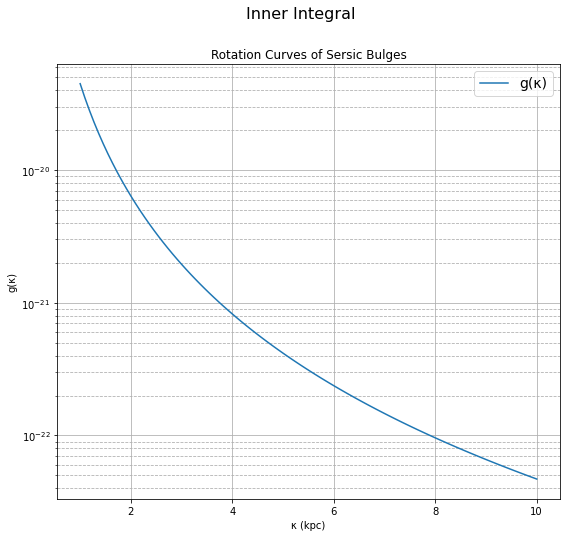

In [4]:
 #plotting inner integral
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #curves
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [5]:
#parameters 
#I0 = 4.1e10                                       #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)


 #equations
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

 #plot range
x = np.linspace(0.001, 19, 200)

 #integrate outer function
h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

y = np.zeros(np.shape(x))
for j,r in enumerate(x):
    hr = lambda m: h(m,r)
    yr = quad(h, 0, r,args=(r,))[0]
    y[j] = yr
    
 #equation
vb = np.sqrt(y)

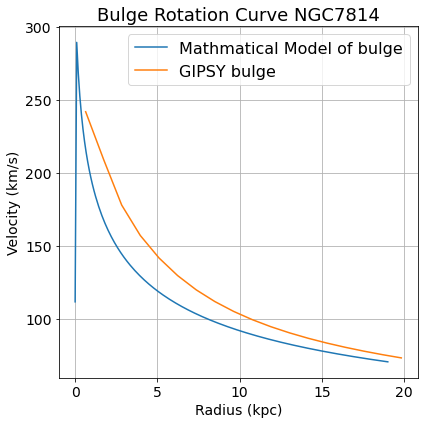

In [9]:
#bulge:
bulge = np.loadtxt('../../testing/7814reallybulge.dat')
r,k,b = bulge.T #ignore k

    
    #plotting bulge velocity curve

fig = plt.figure(figsize=(6.0,6.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


prefactor=4.98 #from our fitting with NGC 7814
 #curves
plt.plot(x, vb, linestyle='solid', label='Mathmatical Model of bulge')          
plt.plot(r, prefactor*b, linestyle='solid', label='GIPSY bulge')          


 #labeling plots
#ax3.set_ylim(0,np.max(v)*1.3)
ax3.set_title('Bulge Rotation Curve NGC7814', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Velocity (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.tight_layout()
plt.savefig('Plot1_n4.png')
plt.show()

In [7]:
executionTime = (time.time() - startTime)
print('Execution time in minutes: ' + str(executionTime/60))

Execution time in minutes: 0.5511011441548666
